In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading**

In [3]:
dataf = pd.read_csv("customer_experience_data.csv")

In [4]:
dataf.head(5)

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1


In [5]:
dataf.columns

Index(['Customer_ID', 'Age', 'Gender', 'Location', 'Num_Interactions',
       'Feedback_Score', 'Products_Purchased', 'Products_Viewed',
       'Time_Spent_on_Site', 'Satisfaction_Score', 'Retention_Status',
       'Gender_Encoded', 'Location_Encoded', 'Retention_Status_Encoded'],
      dtype='object')

In [6]:
dataf.size

14000

In [7]:
dataf.size

14000

**Check for missing values**

In [8]:
dataf.isnull().sum()

Customer_ID                 0
Age                         0
Gender                      0
Location                    0
Num_Interactions            0
Feedback_Score              0
Products_Purchased          0
Products_Viewed             0
Time_Spent_on_Site          0
Satisfaction_Score          0
Retention_Status            0
Gender_Encoded              0
Location_Encoded            0
Retention_Status_Encoded    0
dtype: int64

**Data Preprocessing**

In [9]:
dataf = pd.get_dummies(dataf, drop_first = True)
dataf

,Customer_ID,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded,Gender_Male,Location_Suburban,Location_Urban,Retention_Status_Retained
0,1,56,11,4,18,38,18.319606,7,1,2,1,True,False,True,True
1,2,69,10,3,2,17,9.015198,6,1,1,1,True,True,False,True
2,3,46,5,5,11,46,45.921572,10,1,2,0,True,False,True,False
3,4,32,5,1,6,13,44.105053,5,0,1,0,False,True,False,False
4,5,60,14,5,8,46,17.897471,1,1,2,1,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,60,12,4,5,37,11.853828,8,0,0,0,False,False,False,False
996,997,64,5,4,11,5,25.124461,5,1,0,1,True,False,False,True
997,998,62,6,1,5,28,17.616643,2,0,0,1,False,False,False,True
998,999,35,11,5,4,8,17.006671,9,1,0,1,True,False,False,True


**EDA Exploratory Data Analysis**

In [10]:
dataf.describe()

,Customer_ID,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,43.81900,7.545000,2.985000,10.417000,27.370000,32.274399,5.540000,0.524000,1.032000,0.69400
std,288.819436,14.99103,4.016978,1.418022,5.345623,12.939572,15.734978,2.904279,0.499674,0.809711,0.46106
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,5.114208,1.000000,0.000000,0.000000,0.00000
25%,250.750000,31.00000,4.000000,2.000000,6.000000,17.000000,18.836771,3.000000,0.000000,0.000000,0.00000
50%,500.500000,44.00000,8.000000,3.000000,11.000000,27.500000,32.455598,6.000000,1.000000,1.000000,1.00000
75%,750.250000,56.00000,11.000000,4.000000,15.000000,38.000000,45.932524,8.000000,1.000000,2.000000,1.00000
max,1000.000000,69.00000,14.000000,5.000000,19.000000,49.000000,59.947722,10.000000,1.000000,2.000000,1.00000


**Visualise Distribution of Key Variables**

**1. Visualize Age Distribution**

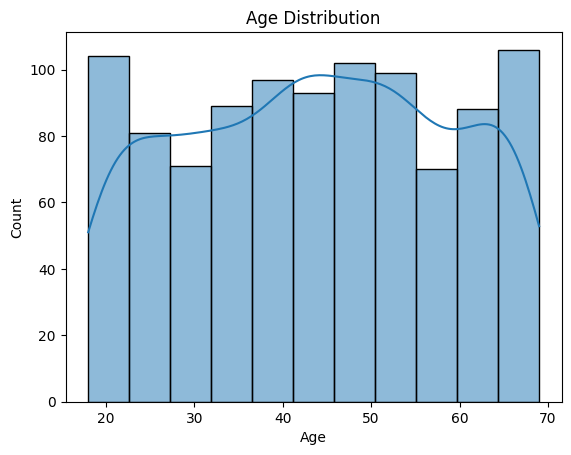

In [11]:
sns.histplot(dataf['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

**2. Visualise Satisfaction Score**

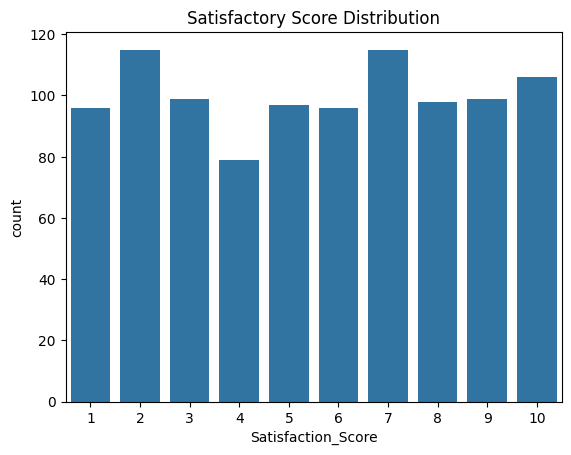

In [12]:
sns.countplot(x= 'Satisfaction_Score', data = dataf)
plt.title('Satisfactory Score Distribution')
plt.show()

**3. Correlation Heatmap to check relationships between variables**

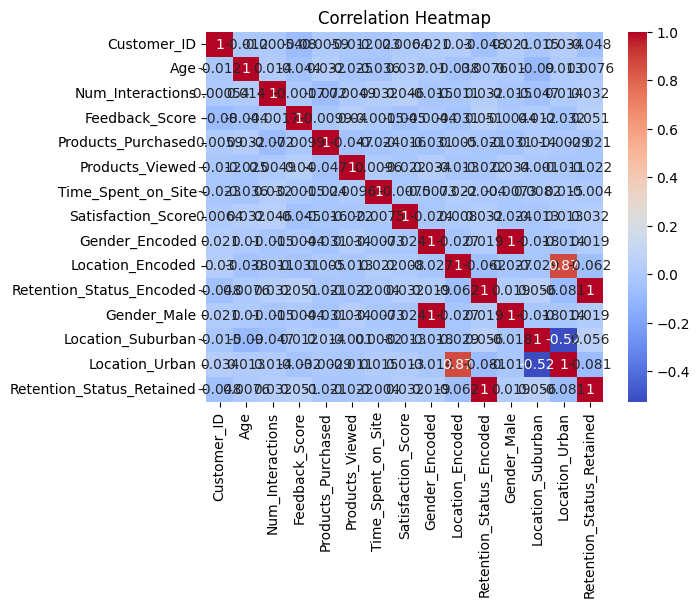

In [13]:
corr = dataf.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
dataf.head()

,Customer_ID,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded,Gender_Male,Location_Suburban,Location_Urban,Retention_Status_Retained
0,1,56,11,4,18,38,18.319606,7,1,2,1,True,False,True,True
1,2,69,10,3,2,17,9.015198,6,1,1,1,True,True,False,True
2,3,46,5,5,11,46,45.921572,10,1,2,0,True,False,True,False
3,4,32,5,1,6,13,44.105053,5,0,1,0,False,True,False,False
4,5,60,14,5,8,46,17.897471,1,1,2,1,True,False,True,True


**Predictive Modelling SciKit Learn**

In [15]:
X = dataf.drop('Retention_Status_Encoded', axis=1)
y = dataf['Retention_Status_Encoded']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_test))
print(classification_report(y_test, y_pred))

[[ 98   0]
 [  0 202]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       202

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [19]:
dataf.size

15000

In [20]:
dataf.head()

,Customer_ID,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded,Gender_Male,Location_Suburban,Location_Urban,Retention_Status_Retained
0,1,56,11,4,18,38,18.319606,7,1,2,1,True,False,True,True
1,2,69,10,3,2,17,9.015198,6,1,1,1,True,True,False,True
2,3,46,5,5,11,46,45.921572,10,1,2,0,True,False,True,False
3,4,32,5,1,6,13,44.105053,5,0,1,0,False,True,False,False
4,5,60,14,5,8,46,17.897471,1,1,2,1,True,False,True,True


In [21]:
# dataf.to_csv('cleaned_customer_data.csv', index=False, encoding='utf-8-sig')

In [22]:
pip install psycopg2

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------ --------------------------- 0.8/2.6 MB 3.2 MB/s eta 0:00:01
   -------------------- ------------------- 1.3/2.6 MB 3.3 MB/s eta 0:00:01
   -------------------------------- ------- 2.1/2.6 MB 3.3 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 3.3 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
!pip install sqlalchemy

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.1 MB 4.1 MB/s eta 0:00:01
   ----------------------------- ---------- 1.6/2.1 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------  2.1/2.1 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 2.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import psycopg2
from sqlalchemy import create_engine

# Load the cleaned CSV file
df = pd.read_csv('cleaned_customer_data.csv')

# PostgreSQL connection details
db_params = {
    "host": "localhost",  # Or your PostgreSQL host
    "port": "5432",       # Default port for PostgreSQL
    "dbname": "Customer_Experience_Database",
    "user": "postgres",
    "password": "1234"
}

# Create a connection string
conn_str = f"postgresql://{db_params['user']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/{db_params['dbname']}"

# Create an SQLAlchemy engine to interact with PostgreSQL
engine = create_engine(conn_str)

# Load the DataFrame into PostgreSQL
df.to_sql('customer_experience', engine, if_exists='replace', index=False)

print("Data loaded successfully into PostgreSQL!")

Data loaded successfully into PostgreSQL!
